# 🏡 Case Study: Analyzing Property Sales Data to Predict Potential Buyers

In this case study, we are working with a real estate dataset containing information about various properties — including their prices, areas, dates of sale, buyer demographics, and other relevant features. Our primary objective is to perform a detailed exploratory data analysis (EDA) to understand the distribution of property prices, trends in sales over time, buyer behaviors, and regional interests. Ultimately, this data-driven insight will help us predict potential buyers and assess the factors that influence property purchasing decisions.

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import numpy as np


The dataset may contain inconsistencies such as extra spacing, invalid entries, or improperly typed columns. Therefore, we start with essential data preparation steps to ensure clean, well-structured data for accurate analysis and modeling. Here's what we do in this initial phase:

1. **Confirm the working directory** to ensure the data file path is correctly referenced.
2. **Load the dataset** from a CSV file using Pandas, skipping any problematic lines.
3. **Remove unnamed and NaN header columns** that often come from messy CSV exports.
4. **Clean column names** by stripping extra spaces for consistency in referencing.
5. **Set Pandas display options** to show all columns and content fully in notebook outputs.
6. **Convert columns to appropriate data types**:
   - Year and month of sale, date parts (Y, M, D) are converted to integers.
   - Age at the time of purchase is parsed to handle missing or non-numeric values gracefully.
   - The `Interval` column is set as categorical data for efficiency and clarity.
7. **Preview the dataset** to verify successful loading and cleaning.
8. **Review dataset structure and summary statistics** to understand the shape and characteristics of the data.
9. **Check for missing values** to inform any required data imputation or exclusion.

This preprocessing forms the foundation for deeper i


In [24]:
# Make sure you're in the correct directory
print("Current Directory:", os.getcwd())
# Load the CSV file
df = pd.read_csv(r'..\\data\\property.csv', encoding='utf-8', on_bad_lines='skip')  # Replace 'your_file.csv' with your actual file path

df = df.loc[:, ~df.columns.str.contains('^Unnamed') & df.columns.notna()]


# Strip extra spaces from column names
df.columns = df.columns.str.strip()
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Disable width truncation
pd.set_option('display.max_colwidth', None) # Show full content in cells

df["Year of sale"] = df["Year of sale"].astype("Int64")
df["Month of sale"] = df["Month of sale"].astype("Int64")

# Convert Y, M, D to integers (assuming no missing values)
df[["Y", "M", "D"]] = df[["Y", "M", "D"]].astype("Int64")


df['Price'] = df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows where Price is NaN (optional but recommended)
df = df.dropna(subset=['Price'])

# Convert age to numeric (handle non-numeric or missing gracefully)
df["Age at time of purchase"] = pd.to_numeric(df["Age at time of purchase"], errors='coerce').astype("Int64")

# Convert Interval to category
df["Interval"] = df["Interval"].astype("category")

# Display the first 5 rows
print(df.head())

# Basic info about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


Current Directory: D:\llm\real-estate-data-insights\notebooks
     ID  Building  Year of sale  Month of sale Type of property  Property #  \
0  1030         1          2005             11        Apartment          30   
1  1029         1          2005             10        Apartment          29   
2  2002         2          2007              7        Apartment           2   
3  2031         2          2007             12        Apartment          31   
4  1049         1          2004             11        Apartment          49   

   Area (ft.)      Price  Status Customer ID      Entity        Name  \
0      743.09  246172.68   Sold        C0028  Individual     Madalyn   
1      756.21  246331.90   Sold        C0027  Individual        Lara   
2      587.28  209280.91   Sold        C0112  Individual     Donavan   
3     1604.75  452667.01   Sold        C0160  Individual      Darien   
4     1375.45  467083.31   Sold        C0014  Individual  Alessandra   

    Surname  Age at time of pu


%matplotlib inline


### 📊 Visualizing the Distribution of Property Prices

In this section, we visualize the distribution of property prices using two histograms to better understand how property values are spread across the dataset.

1. **First Histogram (1000 Bins)**  
   We create a detailed frequency distribution by dividing the entire price range into **1000 equal-width bins**. This high-resolution view helps identify subtle patterns and clusters in property pricing. It is particularly useful for detecting dense price ranges or rare outliers.

2. **Second Histogram (Fixed Bin \$100,000)**  
   To make the distribution more interpretable, especially for stakeholders unfamiliar with statistical binning, we plot a second histogram with bins of **$100,000 intervals**. This approach balances granularity with readability and allows for straightforward financial insights, such as identifying price brackets where most properties are concentrated.

3. **Custom X-Axis Labels**  
   To improve clarity, the x-axis is formatted with **price labels** like `$100,000`, `$200,000`, etc., using `plt.xticks()` with rotation for better readability. We also include a secondary customization where approximately **10 evenly spaced ticks** across the entire price range are displayed, helping viewers gauge distribution at a glance.

These visualizations provide foundational insights into property value trends and support further analysis such as identifying buyer affordability zones or high-demand pricing clusters.


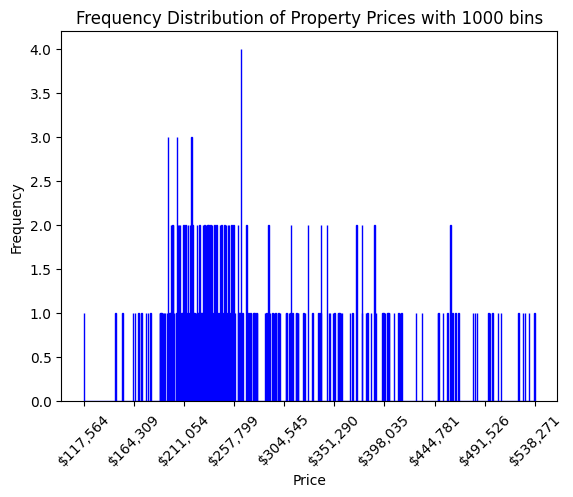

In [26]:


plt.hist(df['Price'], bins=1000, edgecolor='blue')
plt.title('Frequency Distribution of Property Prices with 1000 bins')
plt.xlabel('Price')
plt.ylabel('Frequency')


# Get min and max price
min_price = df['Price'].min()
max_price = df['Price'].max()

# Create about 10 ticks evenly spaced
ticks = np.linspace(min_price, max_price, 10)

# Set ticks with formatted labels
plt.xticks(ticks, [f'${int(tick):,}' for tick in ticks], rotation=45)

plt.show()


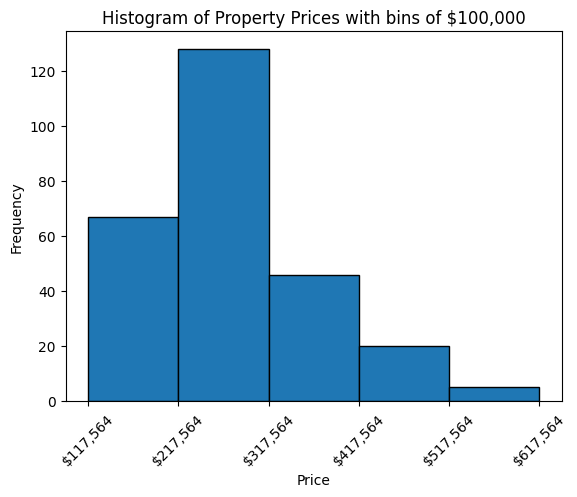

In [27]:


bin_width = 100000
min_price = int(df['Price'].min())
max_price = int(df['Price'].max())

bins = list(range(min_price, max_price + bin_width, bin_width))

plt.hist(df['Price'], bins=bins, edgecolor='black')
plt.title('Histogram of Property Prices with bins of $100,000')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set x-axis ticks to bin edges with formatted labels
plt.xticks(bins, [f'${int(b):,}' for b in bins], rotation=45)

plt.show()

### 📈 Scatter Plot: Price vs. Area

This scatter plot visualizes the relationship between **property price** and **area (in square feet)**. Each point represents a property, plotted with its corresponding area on the x-axis and price on the y-axis.

Key insights this visualization can reveal:
- **Positive trend**: If there’s a general upward slope, it may suggest that larger properties tend to be more expensive.
- **Clusters**: Groups of dots in certain regions may indicate common property sizes or price brackets.
- **Outliers**: Extremely high or low prices for given areas can highlight unusual properties or data issues.

The plot includes a semi-transparent (`alpha=0.5`) view to reduce visual clutter in dense areas, and gridlines for better readability.


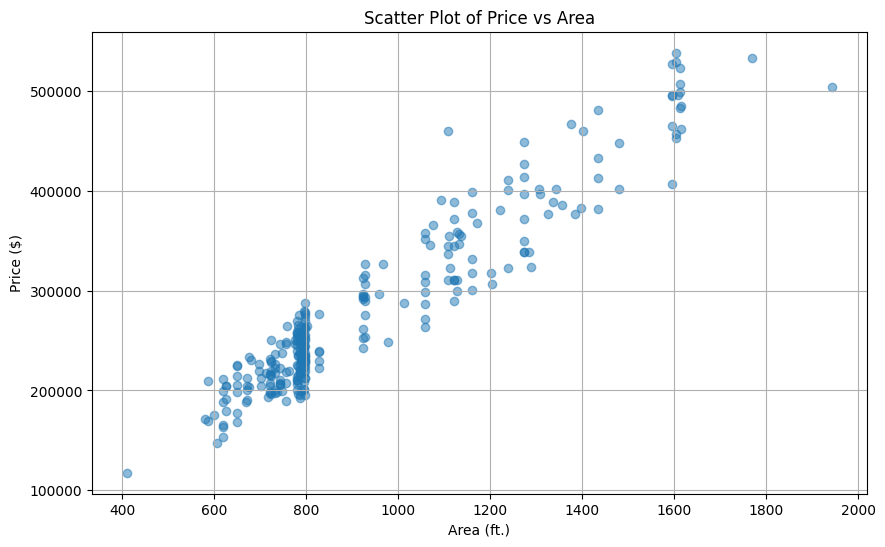

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Area (ft.)'], df['Price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Area')
plt.xlabel('Area (ft.)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

### 🌍 Frequency Distribution Table: Buyers by Country

This table provides a breakdown of property buyers based on their **country of origin**. The frequency distribution includes:

- **Absolute Frequency**: The total number of buyers from each country.
- **Relative Frequency (%)**: The percentage each country contributes to the overall number of buyers.
- **Cumulative Frequency**: A running total of buyers as we move down the list of countries.

This analysis helps identify which regions contribute most to property interest, which is valuable for targeting marketing efforts or tailoring offerings to international buyers.


In [41]:
# Count absolute frequency per country
freq_table = df['Country'].value_counts().reset_index()
freq_table.columns = ['Country', 'Absolute Frequency']

# Calculate relative frequency as a percentage
freq_table['Relative Frequency (%)'] = (freq_table['Absolute Frequency'] / freq_table['Absolute Frequency'].sum()) * 100

# Calculate cumulative frequency
freq_table['Cumulative Frequency'] = freq_table['Absolute Frequency'].cumsum()

freq_table


,Country,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
0,USA,176,90.721649,176
1,Canada,7,3.608247,183
2,Russia,4,2.061856,187
3,UK,2,1.030928,189
4,Belgium,2,1.030928,191
5,Denmark,1,0.515464,192
6,Germany,1,0.515464,193
7,Mexico,1,0.515464,194


### 📊 Pareto Diagram: Buyers by Country

This Pareto diagram visualizes the distribution of buyers across different countries using two key elements:

- **Blue Bars**: Represent the **absolute frequency** of buyers per country.
- **Red Line with Dots**: Displays the **cumulative percentage** of total buyers, following the 80/20 rule principle often used in decision-making.

The right-side y-axis shows cumulative percentages, helping identify


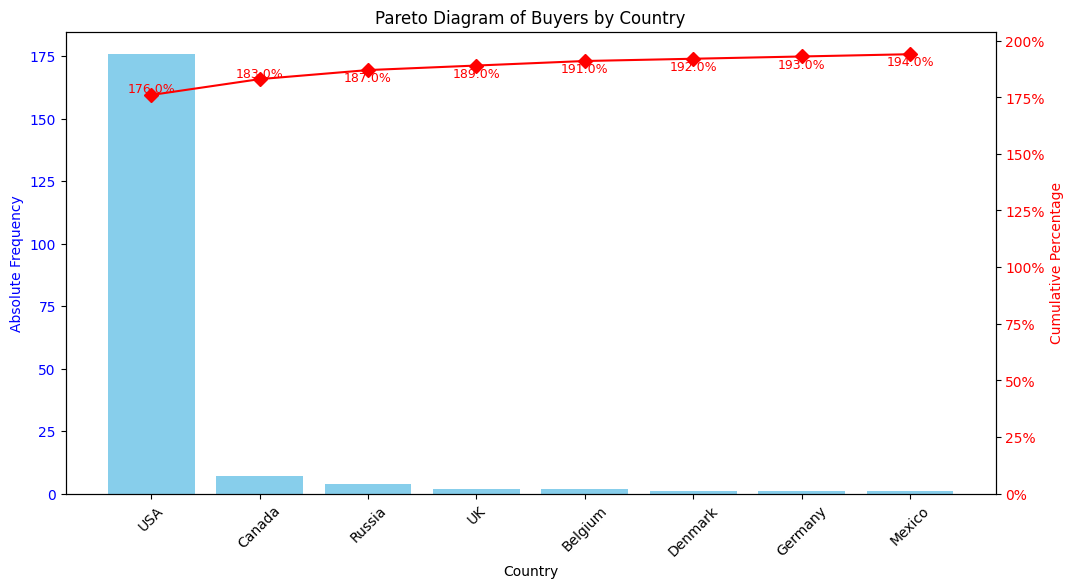

In [43]:
freq_table

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(freq_table['Country'], freq_table['Absolute Frequency'], color='skyblue')
ax.set_xlabel('Country')
ax.set_ylabel('Absolute Frequency', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

ax2 = ax.twinx()
ax2.plot(freq_table['Country'], freq_table['Cumulative Frequency'], color='red', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Increase y-limit to allow label space (e.g., max + 10%)
ymax = freq_table['Cumulative Frequency'].max()
ax2.set_ylim(0, ymax + 10)

# Add labels on each cumulative percentage point with adjusted position
for i, (country, cum_pct) in enumerate(zip(freq_table['Country'], freq_table['Cumulative Frequency'])):
    vertical_offset = 1 if cum_pct < ymax * 0.95 else -5  # put label below if near top
    ax2.text(i, cum_pct + vertical_offset, f'{cum_pct:.1f}%', color='red', ha='center', fontsize=9)

plt.title('Pareto Diagram of Buyers by Country')
plt.show()


### 📈 Statistical Summary of Property Prices

This section calculates and displays key descriptive statistics for the **Price** variable across all properties:

Mean (Average Price)
This is the central value of all property prices. If the mean is significantly higher than the median, it often indicates that a few high-priced properties are skewing the average upward.

Median (Middle Price)
This represents the 50th percentile, meaning half the properties cost less than this amount, and half cost more. It’s less sensitive to outliers and gives a better picture of the typical price than the mean if data is skewed.

Mode (Most Frequent Price)
The price point that appears most frequently in the dataset. If the mode differs significantly from the mean or median, it might suggest clustering of prices around specific values (e.g., budget segments).

Skewness
Indicates the asymmetry of the distribution:

If skewness > 0: Right-skewed — a few expensive properties are inflating the distribution.

If skewness < 0: Left-skewed — a few very cheap properties are pulling the distribution lower.

Skewness close to 0 suggests a fairly symmetric distribution.

Variance & Standard Deviation
These describe the spread or variability in prices:

A high standard deviation means prices vary widely — possibly due to different property sizes, locations, or conditions.

A low standard deviation indicates that prices are clustered near the mean — suggesting a more uniform market.


### 📊 Interpretation of Summary Statistics

#### Central Tendency:
- The **mean price** is higher than the **median**, indicating that the data is not symmetrically distributed.
- The **mode** is even higher, suggesting a small cluster of properties around a specific higher price point — possibly premium listings.

#### Spread and Variability:
- A **high standard deviation** and **variance** confirm that property prices are widely spread, with significant differences between low-end and high-end listings.

#### Skewness:
- The **positive skewness (1.09)** indicates a **right-skewed distribution**.
- This means the **majority of properties are priced in the lower to mid-range**, while a **smaller number of expensive properties** pull the average price upward.


In [44]:
# Ensure 'Price' is in float format (already cleaned from $ and ,)
price_data = df['Price']

mean = price_data.mean()
median = price_data.median()
mode = price_data.mode()[0] if not price_data.mode().empty else None
skewness = price_data.skew()
variance = price_data.var()
std_dev = price_data.std()

print(f"Mean: ${mean:,.2f}")
print(f"Median: ${median:,.2f}")
print(f"Mode: ${mode:,.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Variance: {variance:,.2f}")
print(f"Standard Deviation: {std_dev:,.2f}")


Mean: $281,324.66
Median: $249,333.83
Mode: $460,001.26
Skewness: 1.09
Variance: 7,965,934,735.12
Standard Deviation: 89,252.09


In [45]:
# Ensure the columns are in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area (ft.)'] = pd.to_numeric(df['Area (ft.)'], errors='coerce')

# Drop rows with missing values in either column
subset_df = df[['Price', 'Area (ft.)']].dropna()

# Calculate covariance
covariance = subset_df['Price'].cov(subset_df['Area (ft.)'])

# Calculate correlation coefficient
correlation = subset_df['Price'].corr(subset_df['Area (ft.)'])

print(f"Covariance: {covariance:,.2f}")
print(f"Correlation Coefficient: {correlation:.2f}")


Covariance: 24,217,600.61
Correlation Coefficient: 0.95
